
Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion
matrix, accuracy, error rate, precision and recall on the given dataset.
Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE

### Load

In [2]:
data = pd.read_csv('diabetes.csv')

### Preprocessing

In [3]:
data.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Glucose   768 non-null    int64  
 1   Insulin   768 non-null    int64  
 2   BMI       768 non-null    float64
 3   Pedigree  768 non-null    float64
 4   Age       768 non-null    int64  
 5   Outcome   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


In [5]:
data.head()

,Glucose,Insulin,BMI,Pedigree,Age,Outcome
0,148,0,33.6,0.627,50,1
1,85,0,26.6,0.351,31,0
2,183,0,23.3,0.672,32,1
3,89,94,28.1,0.167,21,0
4,137,168,43.1,2.288,33,1


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


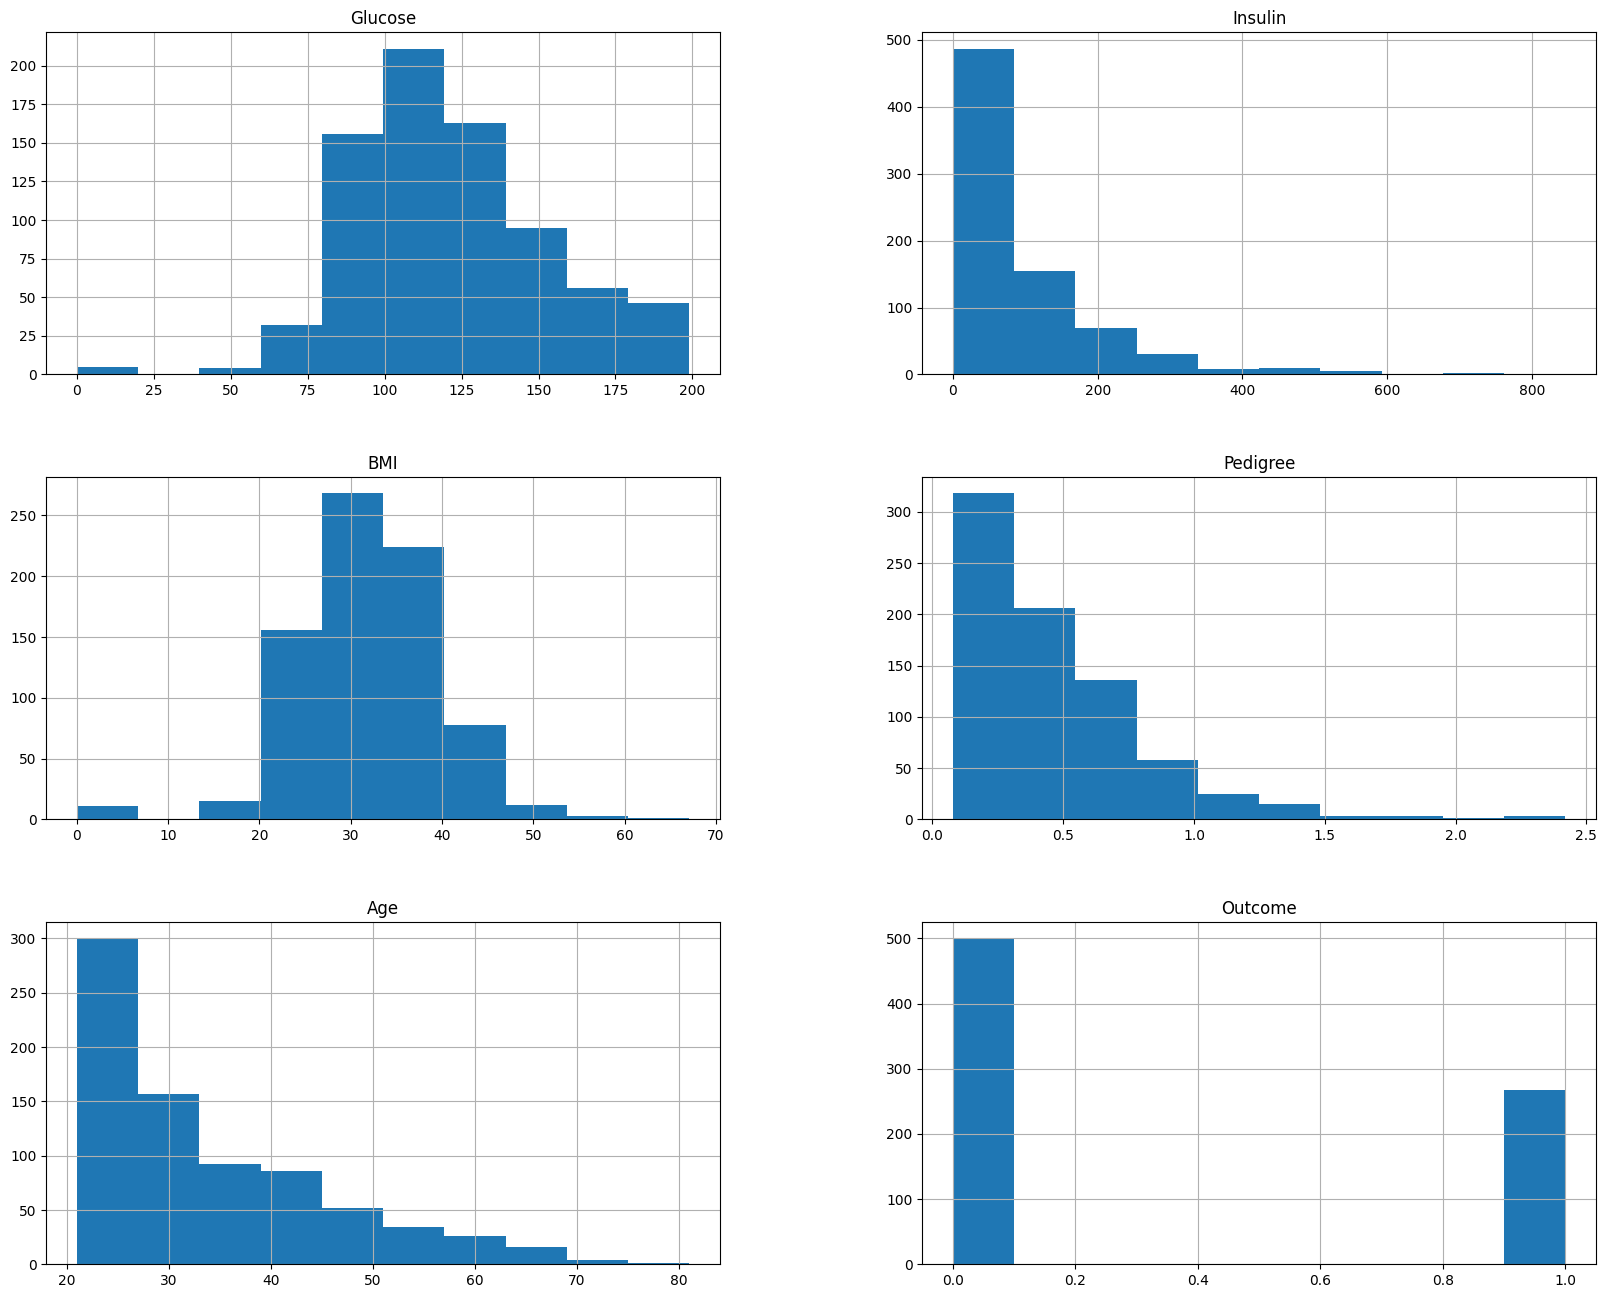

In [7]:
hist = data.hist(figsize=(20,16))

In [8]:
target_feature = 'Outcome'
num_features = list(set(data.columns) - set([target_feature]))

Train test split

In [9]:
X = data.drop(target_feature, axis=1)
y = data[target_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Outliers

In [10]:
data[data['Glucose'] == 0]

,Glucose,Insulin,BMI,Pedigree,Age,Outcome
75,0,0,24.7,0.140,22,0
182,0,23,27.7,0.299,21,0
342,0,0,32.0,0.389,22,0
349,0,0,41.0,0.346,37,1
502,0,0,39.0,0.727,41,1


In [11]:
data[data['BMI'] == 0]

,Glucose,Insulin,BMI,Pedigree,Age,Outcome
9,125,0,0.0,0.232,54,1
49,105,0,0.0,0.305,24,0
60,84,0,0.0,0.304,21,0
81,74,0,0.0,0.102,22,0
145,102,0,0.0,0.572,21,0
371,118,89,0.0,1.731,21,0
426,94,0,0.0,0.256,25,0
494,80,0,0.0,0.174,22,0
522,114,0,0.0,0.189,26,0
684,136,0,0.0,0.640,69,0


In [12]:
imputer = SimpleImputer(missing_values=0.0, strategy='median')
imputer.fit(X_train[['Glucose','BMI']])
X_train[['Glucose','BMI']] = imputer.transform(X_train[['Glucose','BMI']])
X_test[['Glucose','BMI']] = imputer.transform(X_test[['Glucose','BMI']])

Сlass balancing

Text(0, 0.5, 'Proportion')

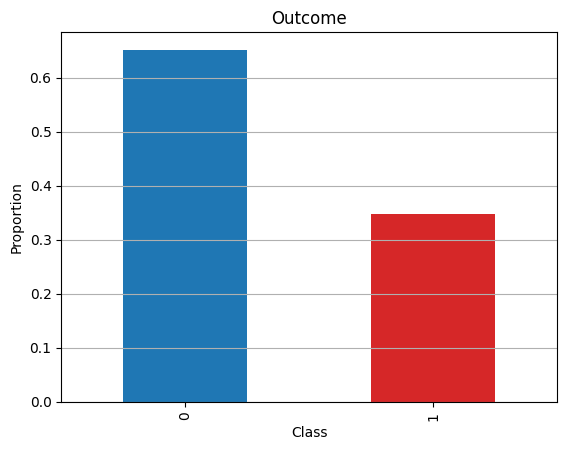

In [13]:
y_train.value_counts(normalize=True).plot.bar(color=['tab:blue', 'tab:red'])
plt.grid(axis='y')
plt.title(target_feature)
plt.xlabel('Class')
plt.ylabel('Proportion')

In [14]:
smote = SMOTE(random_state=10)
X_train_resize, y_train_resize = smote.fit_resample(X_train, y_train)

Text(0, 0.5, 'Proportion')

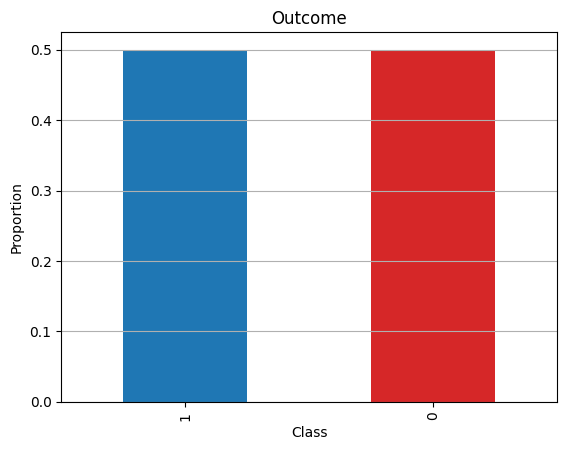

In [15]:
y_train_resize.value_counts(normalize=True).plot.bar(color=['tab:blue', 'tab:red'])
plt.grid(axis='y')
plt.title(target_feature)
plt.xlabel('Class')
plt.ylabel('Proportion')

Correlation matrix

In [16]:
X_train_resize[num_features].corr().style.background_gradient(cmap='coolwarm')

,Insulin,Glucose,Age,Pedigree,BMI
Insulin,1.000000,0.287702,-0.015798,0.156433,0.178849
Glucose,0.287702,1.000000,0.251339,0.172458,0.248111
Age,-0.015798,0.251339,1.000000,-0.006707,-0.001412
Pedigree,0.156433,0.172458,-0.006707,1.000000,0.222571
BMI,0.178849,0.248111,-0.001412,0.222571,1.000000


Scaling

In [17]:
scaler = StandardScaler()
X_train_resize = scaler.fit_transform(X_train_resize)
X_train_resize = pd.DataFrame(X_train_resize, columns=num_features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=num_features)

### Training

In [18]:
def print_metrics(y_true, y_pred):
    print('Metrics:')
    print(f'f1_score = {f1_score(y_true=y_true, y_pred=y_pred).round(3)}')
    print(f'recall_score = {recall_score(y_true=y_true, y_pred=y_pred).round(3)}')
    print(f'precision_score = {precision_score(y_true=y_true, y_pred=y_pred).round(3)}')

def print_confusion_matrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true=y_true, y_pred=y_pred), annot=True, cmap='coolwarm', cbar=False)
    plt.title('Confusion matrix')
    plt.xlabel('Predict')
    plt.ylabel('Actual')
    plt.show()

def print_roc_auc(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)

    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC: {auc.round(3)}')
    plt.show()

def print_params(model):
    print('Model parameters:')
    print(f'K neighbors = {model.n_neighbors}')
    print(f'Power = {model.p}')

def start_train(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_prep = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]

    print_params(model=model)
    print_metrics(y_true=y_test, y_pred=y_prep)
    print_confusion_matrix(y_true=y_test, y_pred=y_prep)
    print_roc_auc(y_true=y_test, y_pred_prob=y_pred_prob)



Model parameters:
K neighbors = 5
Power = 2
Metrics:
f1_score = 0.678
recall_score = 0.741
precision_score = 0.625


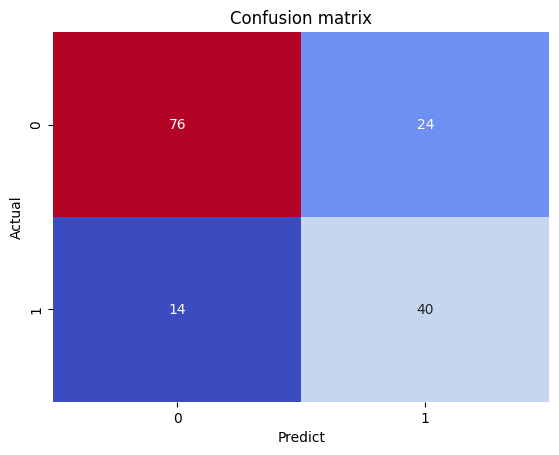

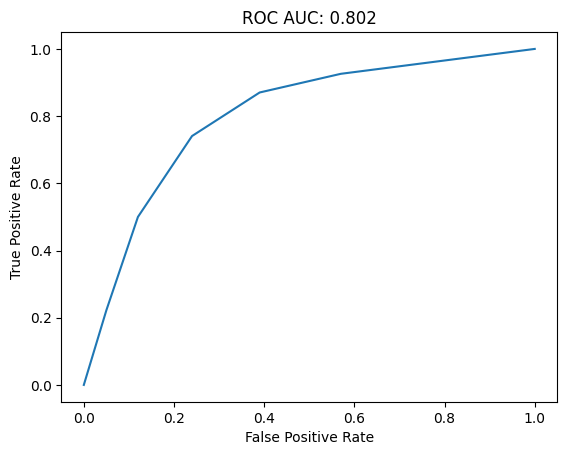

In [19]:
start_train(model=KNeighborsClassifier(), X_train=X_train_resize, y_train=y_train_resize, X_test=X_test, y_test=y_test)

Hyperparameter tuning

Model parameters:
K neighbors = 7
Power = 1
Metrics:
f1_score = 0.701
recall_score = 0.759
precision_score = 0.651


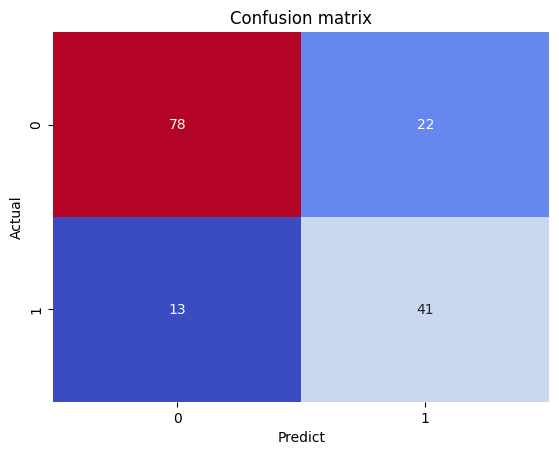

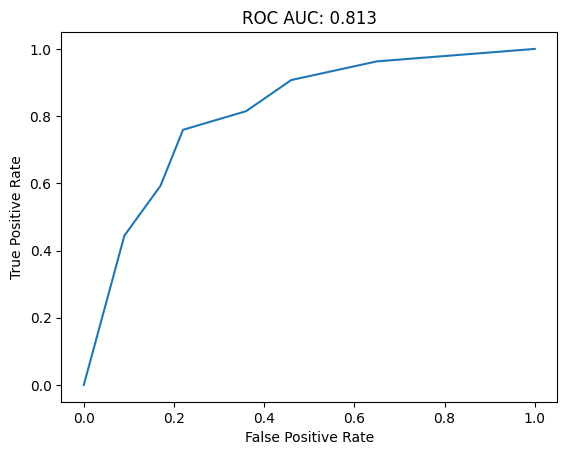

In [20]:
param_grid = {
    'n_neighbors': range(1, 51),
    'p': range(1, 4)
}
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid.fit(X_train_resize, y_train_resize)
model = grid.best_estimator_
start_train(model=model, X_train=X_train_resize, y_train=y_train_resize, X_test=X_test, y_test=y_test)